# Let's load and explore the dataset.

In [1]:
pip install --upgrade openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

C:\Users\lenovo\anaconda3\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lenovo\anaconda3\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Load the dataset

data = pd.read_excel("C:/Users/lenovo/Downloads/breast+cancer+coimbra/dataR2.xlsx")

# Display the first few rows of the dataset and the general information


data.head()



,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


# The dataset consists of 116 entries with 10 columns. Here are the columns:
* 1. Age: Age of the individual.
* 2. BMI: Body Mass Index.
* 3. Glucose: Glucose level.
* 4. Insulin: Insulin level.
* 5. HOMA: Homeostatic Model Assessment.
* 6. Leptin: Leptin level.
* 7. Adiponectin: Adiponectin level.
* 8. Resistin: Resistin level.
* 9. MCP.1: Monocyte Chemoattractant Protein-1 level.
* 10. Classification: Target variable (1 for breast cancer, 0 for no breast cancer).

# Data Preprocessing

In [8]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


#### Checking the null values if any

In [9]:
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [10]:
data['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

### Now we will scale the data and to do this we use Standardization, which transforms the data to have mean of 0 and standard deviation of 1.

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Define features and target variables

X = data.drop(columns = ['Classification'])
Y = data['Classification']

# Scale the data

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Create a dataframe with scaled features

scaled_data = pd.DataFrame(scaled_X, columns=X.columns)
scaled_data['Classification'] = Y.values

# Verify the scaling
print(scaled_data.head())

        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0 -0.579794 -0.816675 -1.239222 -0.728739 -0.614282 -0.932334    -0.070222   
1  1.601821 -1.378751 -0.258299 -0.688038 -0.548240 -0.930413    -0.697350   
2  1.539489 -0.891764 -0.302887 -0.550073 -0.464752 -0.454219     1.797998   
3  0.666843 -1.243303 -0.927110 -0.676965 -0.574210 -0.876021    -0.441945   
4  1.788816 -1.294601 -0.258299 -0.644743 -0.521081 -1.042682    -0.786881   

   Resistin     MCP.1  Classification  
0 -0.545517 -0.341251               1  
1 -0.864214 -0.191224               1  
2 -0.441660  0.058214               1  
3 -0.158867  1.142718               1  
4 -0.336352  0.694716               1  


### Let's perform Exploratory Data Analysis (EDA) to understand the distributions and relationships between the features. We'll start with some basic visualizations:

1.Histograms of each feature to understand their distributions.
2.Correlation heatmap to see relationships between features.

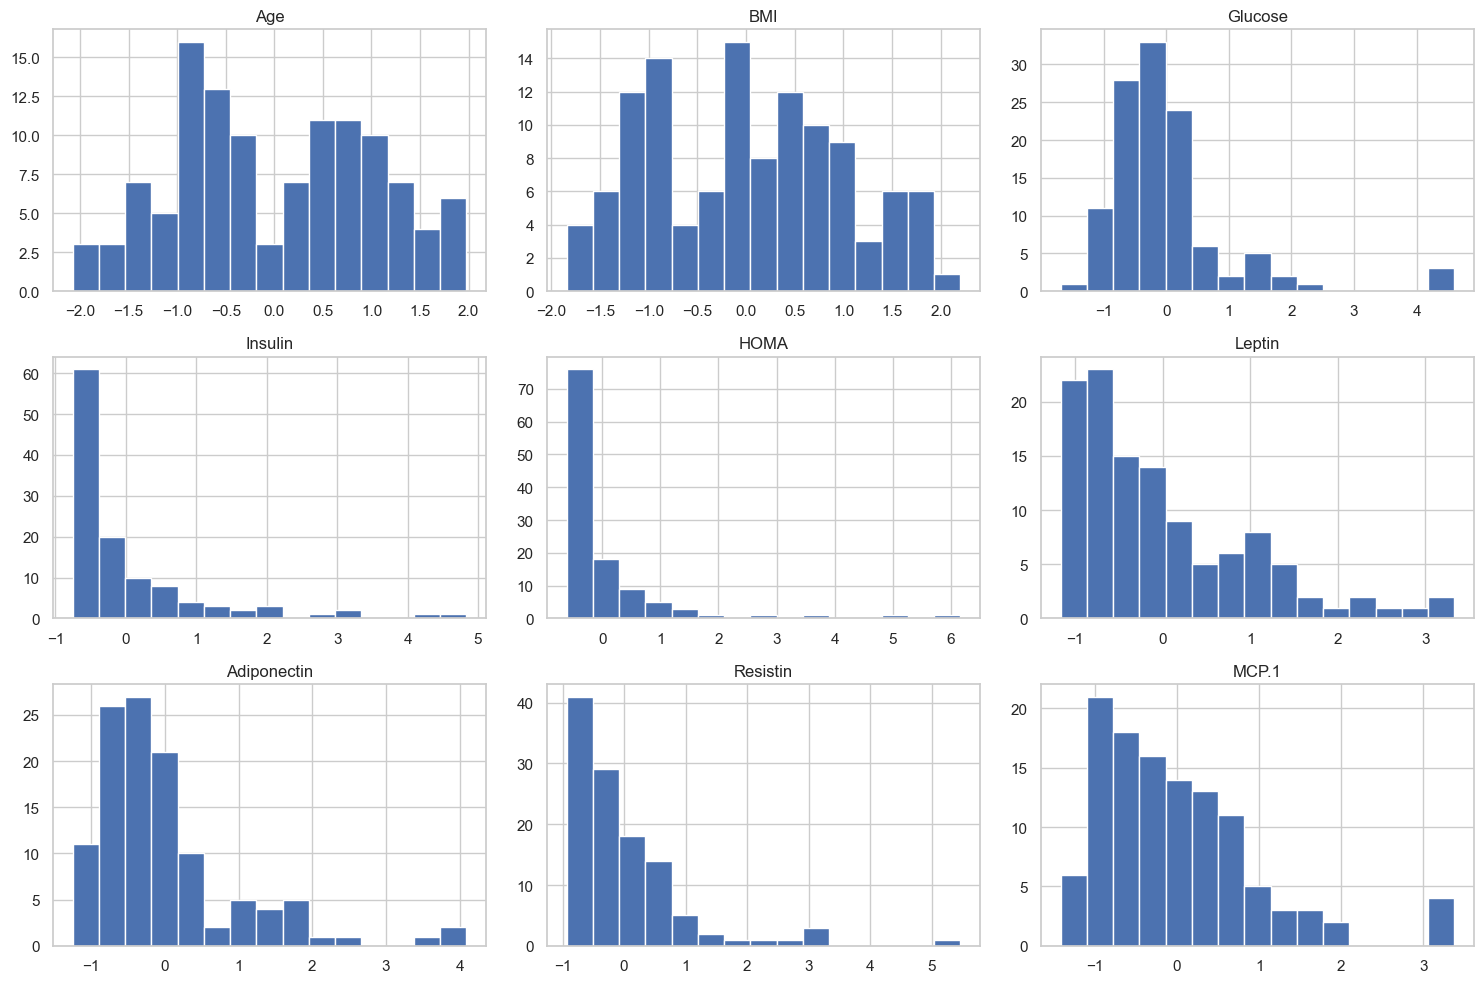

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for each feature
scaled_data.drop(columns=['Classification']).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()


plt.show()

The histograms provide a visual overview of the distribution of each feature after scaling. Most features appear to be approximately normally distributed.

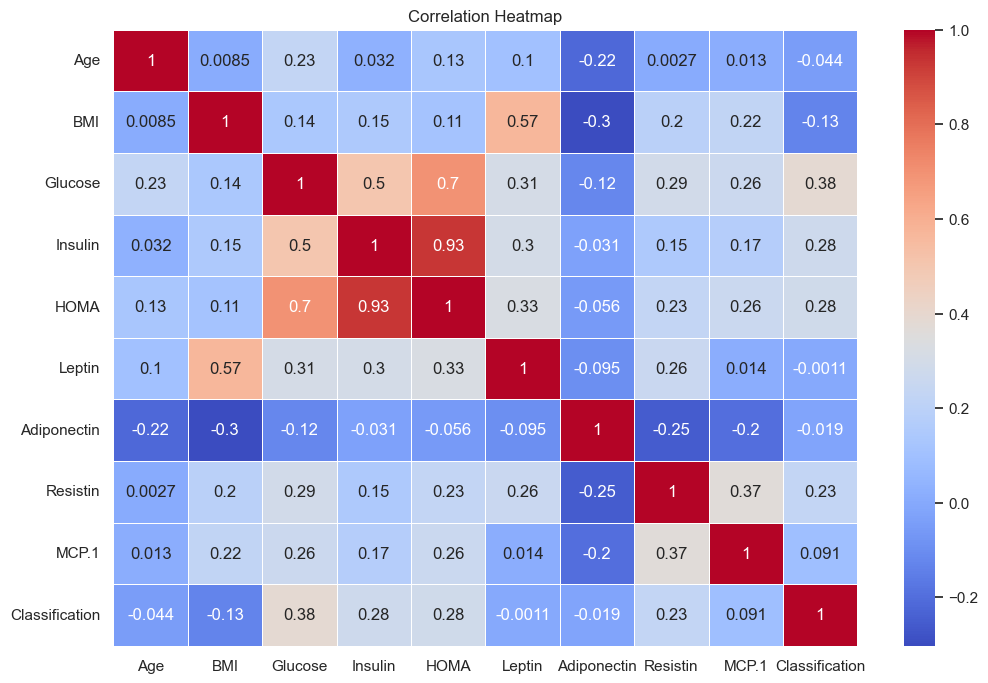

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### The correlation heatmap shows the relationships between the features.Correlations include:

#1. HOMA and Insulin are highly correlated.
#2. Leptin and BMI have a moderate positive correlation.
#3. Resistin and MCP.1 show a weak positive correlation.

# Model Selection and Training

In [19]:
# Split the data

from sklearn.model_selection import train_test_split

# Define features and target variable
X = scaled_data.drop(columns=['Classification'])
Y = scaled_data['Classification']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [20]:
# Training the multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(f"Precision: {precision_score(Y_test, Y_pred)}")
    print(f"Recall: {recall_score(Y_test, Y_pred)}")
    print(f"F1 Score: {f1_score(Y_test, Y_pred)}")
    print("\n")

Logistic Regression:
Accuracy: 0.7916666666666666
Precision: 0.75
Recall: 0.8181818181818182
F1 Score: 0.7826086956521738


Decision Tree:
Accuracy: 0.6666666666666666
Precision: 0.6153846153846154
Recall: 0.7272727272727273
F1 Score: 0.6666666666666667


Random Forest:
Accuracy: 0.7083333333333334
Precision: 0.6428571428571429
Recall: 0.8181818181818182
F1 Score: 0.7200000000000001


Support Vector Machine:
Accuracy: 0.75
Precision: 0.6923076923076923
Recall: 0.8181818181818182
F1 Score: 0.7500000000000001




# Feature importance

In [21]:
importances = models["Random Forest"].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

       Feature  Importance
2      Glucose    0.214357
7     Resistin    0.163583
4         HOMA    0.133338
1          BMI    0.115555
0          Age    0.093259
5       Leptin    0.087438
8        MCP.1    0.064477
6  Adiponectin    0.064299
3      Insulin    0.063696


This is used to determine and display the importance of each feature in the prediction model, specifically for tree-based models like Random Forest.The output will be a sorted list of features along with their importance scores. Features with higher scores have a greater impact on the model's predictions. This information can be used to understand which features are most influential in predicting the target variable, and it can also help in feature selection, potentially improving model performance by removing less important features.






 

# Best Model:- 
Based on the provided metrics, Logistic Regression and Support Vector Machine (SVM) are the top-performing models. They both have high accuracy and F1 scores, indicating a good balance between precision and recall. However, Logistic Regression has a slightly higher F1 score, making it the best overall choice.

# Detailed Interpretation Of Feature importance:-
* 1.Glucose: The most important feature, suggesting that higher glucose levels are strongly associated with breast cancer risk in the dataset
* 2.Resistin: The second most important feature, indicating a significant role in predicting breast cancer.
* 3.HOMA: Reflects insulin resistance, which is also an important predictor.
* 4.BMI: Body Mass Index is a known risk factor for various health conditions, including breast cancer.
* 5.Age: Older age is associated with a higher risk of breast cancer.
* 6.Leptin: This hormone is involved in regulating energy balance and can be linked to cancer development.
* 7.MCP.1: A protein involved in inflammation, which has a moderate impact on the predictions.
* 8.Adiponectin: A hormone related to glucose regulation and fatty acid breakdown, also moderately important.
* 9.Insulin: Though it has the lowest importance score among the features, it still contributes to the model's predictions.

# Conclusion
Based on the feature importance analysis and model performance metrics, we can conclude the following:

### Key Predictive Features:

* 1.Glucose: Most critical in predicting breast cancer, implying glucose level monitoring could be crucial in early detection.
* 2.Resistin and HOMA: Significant indicators, suggesting that insulin resistance and associated factors are also important.
* 3.BMI and Age: Important demographic and health metrics that contribute to risk assessment.

### Model Choice:

Logistic Regression and SVM are the top-performing models. Considering Logistic Regression has a slightly higher F1 score, it could be preferred for its simplicity and interpretability.
Random Forest provides valuable insights into feature importance and could be used for further feature engineering and analysis.

### Practical Implications:

*Healthcare Focus: Medical practitioners could focus on monitoring glucose and resistin levels, along with BMI and age, for early breast cancer detection.
*Preventive Measures: Strategies to manage glucose levels and insulin resistance might help in reducing breast cancer risk.
    

# Hyperparameter Tuning

We'll use GridSearchCV from sklearn to perform hyperparameter tuning for Logistic Regression and SVM.

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Initialize models
lr = LogisticRegression()
svm = SVC()

# Perform Grid Search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1')

# Fit models
grid_search_lr.fit(X_train, Y_train)
grid_search_svm.fit(X_train, Y_train)

# Best parameters and scores
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 score for Logistic Regression:", grid_search_lr.best_score_)
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best F1 score for SVM:", grid_search_svm.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.7647058823529411
Best parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best F1 score for SVM: 0.7895134896063689


# Best Model


Best Model: Based on the hyperparameter tuning results, the SVM model with an F1 score of approximately 0.79 is the better performer compared to the Logistic Regression model. This means the SVM model is slightly better at correctly identifying cases of breast cancer (high recall) while maintaining a good balance with precision (low false positives).